# Exploratory Data Analysis in Python

* Exploratory data analysis: A process and a set of techniques for working with data, especially in the early stages of a project, or when you are working with a new data set. 

* Link: https://learn.datacamp.com/courses/exploratory-data-analysis-in-python

## Course Description

How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. You'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods you learn apply to all areas of science, engineering, and business. You'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

In [3]:
import pandas as pd
datapath = '/content/drive/MyDrive/Colab Notebooks/Career Track - Data Scientist with Python/19 - Course - Exploratory Data Analysis in Python/datasets/'

# Chapter 1 - Read, clean, and validate

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.

## DataFrames and Series

* The goal of exploratory data analysis is to use data to answer questions and guide decision making.

### Using data to answer questions

What is the average birth weight of babies in the United States?
* Find appropriate data, or collect it
* Read data in your development environment
* Clean and validate

### National Survey of Family Growth (NSFG)

* The 2013-2015 dataset includes information about a representative sample of women in the U.S. and their children.

* More on the dataset: https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999

In [4]:
# Our dataset
filename = 'nsfg.hdf5'
nsfg = pd.read_hdf(datapath + filename, 'nsfg')
type(nsfg)

pandas.core.frame.DataFrame

In [5]:
print(nsfg.head())

   caseid  outcome  birthwgt_lb1  ...  agepreg  hpagelb  wgt2013_2015
0   60418        1           5.0  ...   2075.0     22.0   3554.964843
1   60418        1           4.0  ...   2358.0     25.0   3554.964843
2   60418        1           5.0  ...   3308.0     52.0   3554.964843
3   60419        6           NaN  ...      NaN      NaN   2484.535358
4   60420        1           8.0  ...   2266.0     24.0   2903.782914

[5 rows x 10 columns]


In [6]:
nsfg.shape

(9358, 10)

In [7]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

### Each column is a Series

* You can select a column from a DataFrame using the bracket operator, with a string as the key.

* The result is a Series, which is another Pandas data structure.

In [8]:
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

## Clean and Validate

### Selecting columns

In [9]:
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [10]:
# Sorting babies by weight
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

### Describe

* Computes summary statistics like the mean, standard deviation, min, and max. 

* `count` is the number of values.
* The `min` and `max` values are 0 and 99, and the `50th` percentile, which is the median, is 7.
* The `mean` is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. 
  * Before we can really compute the mean, we have to replace those values with NaN to represent missing data.

In [11]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

### Replace

* The replace() method takes a list of values we want to replace and the value we want to replace them with. 

In [12]:
import numpy as np

# Including baby weights of 98 and 99 (special values / non representative)
print(pounds.mean())

# Removing baby weights of 98 and 99 to get the correct mean
pounds = pounds.replace([98, 99], np.nan)
print(pounds.mean())

8.055204317656129
6.703286384976526


In [13]:
# Using 'inplace' argument
ounces.replace([98, 99], np.nan, inplace=True)

### Arithmetic with Series


In [14]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

## Filter and Visualize

### Histogram

* Histogram does not work with `NaN`, so we have to use the `dropna()` function.

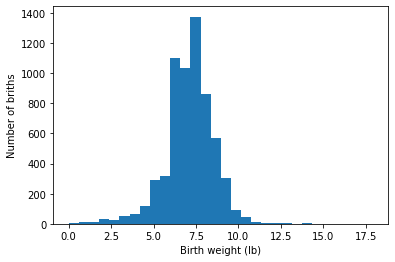

In [15]:
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Number of briths')
plt.show()

### Boolean Series

In [16]:
# Preterm babies (bebês prematuros) have les than 37 weeks of pregnancy
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [17]:
# Number of preterm babies
preterm.sum()

3742

In [18]:
# About 40% of babies in the dataset are preterm
preterm.mean()

0.39987176747168196

### Filtering

* Logical operators
  * `~` for NOT (changes the value)
  * & for AND (both must be true)
  * | for OR (either or both can be true)


In [19]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [20]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

### Resampling

* NSFG is not representative of the U.S.population.
* Some groups are "oversampled", which means some groups are more likely to appear in the sample than others.
  * Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. 
  * We can correct for oversampling by resampling.



### Exercise 1 - Make a histogram

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

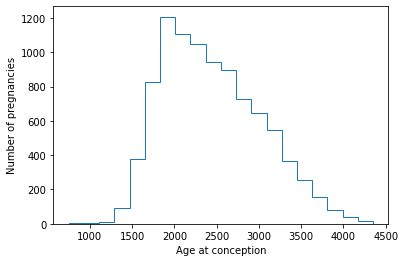

In [21]:
# Plot the histogram
plt.hist(nsfg['agecon'], bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

### Exercise 2 - Compute birth weight

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, `resample_rows_weighted`, that takes the NSFG data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then I extract `birthwgt_lb1` and `birthwgt_oz1`, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

In [22]:
if False:
    # Resample the data
    nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

    # Clean the weight variables
    pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
    ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

    # Compute total birth weight
    birth_weight = pounds + ounces/16

In [23]:
if False:
    # Create a Boolean Series for full-term babies
    full_term = nsfg['prglngth'] >= 37

    # Select the weights of full-term babies
    full_term_weight = birth_weight[full_term]

    # Compute the mean weight of full-term babies
    print(full_term_weight.mean())

'''
Output:
    7.392597951914515
'''

'\nOutput:\n    7.392597951914515\n'

### Exercise 3 - Filter

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

In [24]:
if False:
    # Filter full-term babies
    full_term = nsfg['prglngth'] >= 37

    # Filter single births
    single = nsfg['nbrnaliv'] == 1

    # Compute birth weight for single full-term babies
    single_full_term_weight = birth_weight[full_term & single]
    print('Single full-term mean:', single_full_term_weight.mean())

    # Compute birth weight for multiple full-term babies
    mult_full_term_weight = birth_weight[full_term & ~single]
    print('Multiple full-term mean:', mult_full_term_weight.mean())

'''
Output:
    Single full-term mean: 7.40297320308299
    Multiple full-term mean: 5.784722222222222
'''

'\nOutput:\n    Single full-term mean: 7.40297320308299\n    Multiple full-term mean: 5.784722222222222\n'

# Chapter 2 - Distributions

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.


## Probability mass functions

### GSS (General Social Survey)

* Annual sample of U.S. population.
* Asks about demographics, social and political beliefs.
* Widely used by policy makers and researchers.

* The dataset has already been cleaned and validated.

In [25]:
# Our dataset
filename = 'gss.hdf5'
gss = pd.read_hdf(datapath + filename, 'gss')
type(gss)

pandas.core.frame.DataFrame

In [26]:
print(gss.head())

   year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893


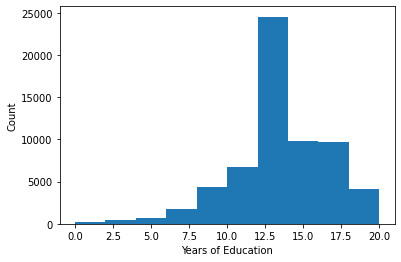

In [27]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.show()

### PMF (Probability Mass Function)

* The data shown above in the histogram is better visualized with a PMF.
* PMF contains the **unique values** in the dataset and how often each one appears. 
* They are good to know where the peaks are.
* PMF represents the possible values in a distribution and their probabilities. 
* Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. 
* Because the histogram puts values into bins, it obscures some details. 



In [28]:
# Install the Pmf class to calculate the PMF
!pip install empiricaldist

* empiricaldist package
  * Install: https://pypi.org/project/empiricaldist/
  * How to use it: https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb

In [29]:
# Example
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ, normalize=False)

'''
The result is a Series that contains the values on the left 
and the counts on the right. In this dataset, there are 144
respondents who report that they have zero years of formal
education.
'''

pmf_educ.head()

0.0    144
1.0     38
2.0    151
3.0    246
4.0    290
Name: educ, dtype: int64

In [30]:
# Absolute number of people with 12 years of education
pmf_educ[12]

19145

In [31]:
# Normalizing the PMF, that is, a PMF 
# where the frequencies add up to 1.
pmf_educ = Pmf.from_seq(educ, normalize=True)
pmf_educ.head()

0.0    0.002311
1.0    0.000610
2.0    0.002424
3.0    0.003948
4.0    0.004655
Name: educ, dtype: float64

In [32]:
# There are 19145 respondents with 12 years of education, 
# which corresponds of a fraction of 0.3072, a little more 
# than 30%, of que total dataset.
pmf_educ[12]

0.3072836414997432

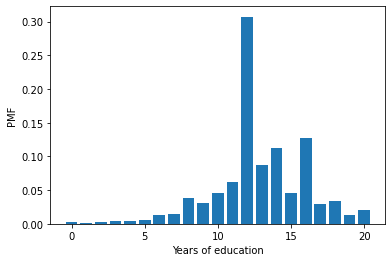

In [33]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

### Exercise 1 - Plot a PMF

Let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

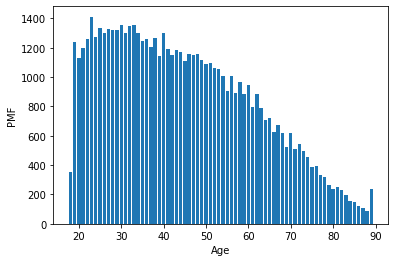

In [34]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age, normalize=False)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

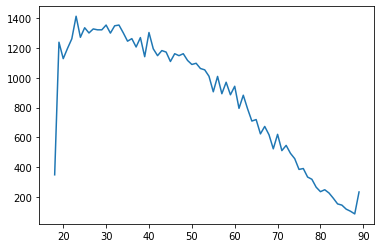

In [35]:
pmf_age.plot()

## Cumulative distribution functions (CDF)

* CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

If you draw a random element from a distribution:
* PMF (Probability Mass Function) is the probability that you get exactly x for a given value of x.
* CDF (Cumulative Distribution Function) is the probability that you get a value <= x for a given value of x.

### Example

* PMF of {1, 2, 2, 3, 5}
  * PMF(1) = 1/5
  * PMF(2) = 2/5
  * PMF(3) = 1/5
  * PMF(5) = 1/5

* CDF is the cumulative sum of the PMF.
  * CDF(1) = 1/5
  * CDF(2) = 3/5
  * CDF(3) = 4/5
  * CDF(5) = 1

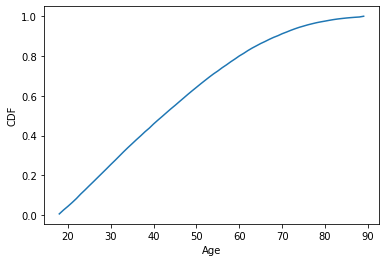

In [36]:
from empiricaldist import Cdf

cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [37]:
# Given CDF an age, it returns the corresponding probability
age = 51
p = cdf(age)

# 66% of the respondents are 51 years old or younger.
print(p)

0.6602013455146835


### Evaluating the inverse CDF

* The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. 

* In the below example, the probability 0.25 returns 30. That means that 25% of the respondents are age 30 or less. 
  * Another way to say the same thing is "age 30 is the 25th percentile of this distribution". 

* Also, probability 0.75 returns 57, so 75% of the respondents are 57 or younger. 

* By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. 
  * It measures the spread of the distribution, so it is similar to standard deviation or variance.
  * Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. 
  * So IQR (interquartile range) can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

In [38]:
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


In [39]:
p = 0.75
q = cdf.inverse(p)
print(q)

57.0


### Execise 1 - Compute IQR

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the `'realinc'` column, and the CDF of income has already been computed and stored in `cdf_income`.

In [40]:
cdf_income = Cdf.from_seq(gss['realinc'])

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


### Exercise 2 - Plot a CDF

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable `'realinc'` represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

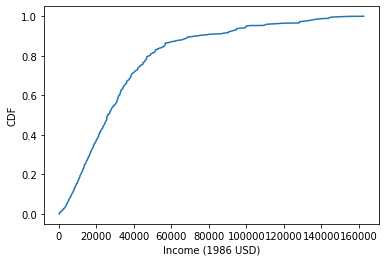

In [41]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Comparing distributions

* In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. 

* The CDF is recommended for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two. 

* PMFs don't work very well when the data have a large number of unique values.

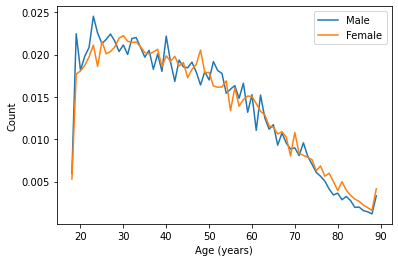

In [42]:
# Multiple PMFs
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]

Pmf.from_seq(male_age).plot(label='Male')
Pmf.from_seq(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

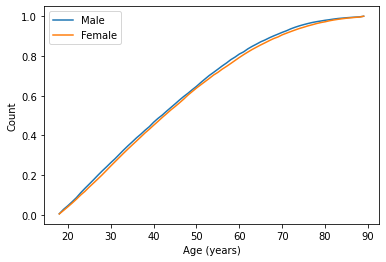

In [43]:
# Multiple CDFs
Cdf.from_seq(male_age).plot(label='Male')
Cdf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(loc="upper left")
plt.show()

* In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

### Income distribution

* Another example

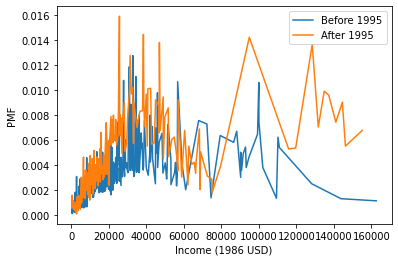

In [44]:
'''
There are a lot of unique values in this distribution, and none of 
them appear very often. The PMF is so noisy, we can't really see the
shape of the distribution. It looks like there are more people with 
high incomes after 1995, but it's hard to tell. We can get a clearer
picture with a CDF.
'''
income = gss['realinc']
pre95 = gss['year'] < 1995
Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

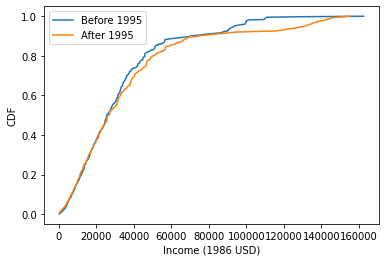

In [45]:
Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

### Exercise 1 - Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. 

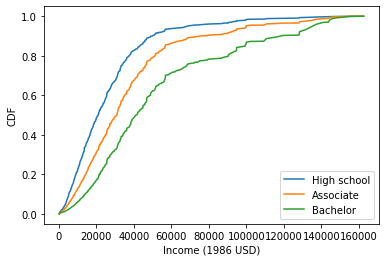

In [46]:
educ = gss['educ']
bach = (educ >= 16) # Bachelor's degree
assc = ((educ >= 14) & (educ < 16)) # Associate degree
high = (educ <= 12) # High school (12 or fewer years of education)

# Plot the CDFs
income = gss['realinc']
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling distributions

### The normal distribution (Gaussian distribution)

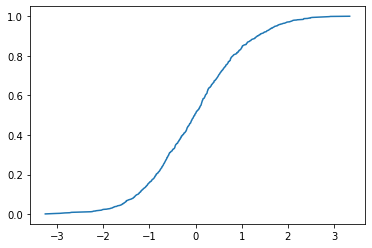

In [47]:
import numpy as np
sample = np.random.normal(size=1000)
Cdf.from_seq(sample).plot()

### The normal CDF

* SciPy provides an object called norm that represents the normal distribution. 

* `np.linspace()` creates an array of equally-spaced points from -3 to 3.
* `norm(0, 1)` creates an object that represents a normal distribution with mean 0 and standard deviation 1.
* `.cdf()` evaluates the CDF of the normal distribution. 

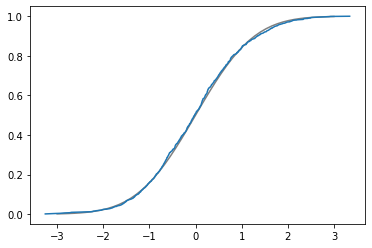

In [48]:
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='gray')
Cdf.from_seq(sample).plot()

### The bell curve (PDF)

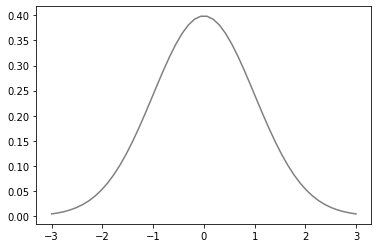

In [49]:
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)
plt.plot(xs, ys, color='gray')

### Sample PMF

* The PMF of the sample is a flat line across the bottom. 
* In the random sample, every value is unique, so they all have the same probability, one in 1000. 
* However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. 
  * It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

### KDE plot

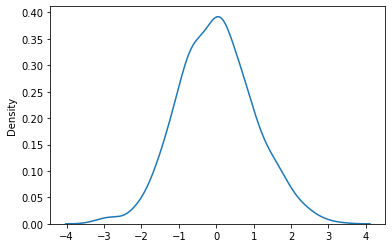

In [50]:
import seaborn as sns
sns.kdeplot(sample)

### KDE and PDF

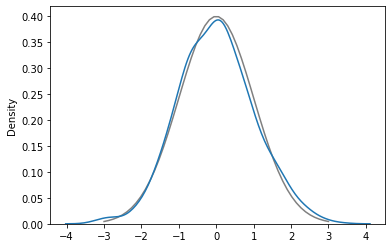

In [51]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

### PMF, CDF, KDE

* Use CDFs for exploration.
  * They give the best view of what's going on without getting distracted by noise.
* Use PMFs if there are a small number of unique values.
* Use KDE if there are a lot of values.

### Exercise 1 - Distribution of income

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's `np.log10()` function.

Then, you'll use the computed mean and standard deviation to make a norm object using the `scipy.stats.norm()` function.

In [52]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


### Exercise 2 - Comparing CDFs

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. 

`dist` is a `scipy.stats.norm` object with the same mean and standard deviation as the data. It provides `.cdf()`, which evaluates the normal cumulative distribution function.

Be careful with capitalization: `Cdf()`, with an uppercase `C`, creates `Cdf` objects. `dist.cdf()`, with a lowercase `c`, evaluates the normal cumulative distribution function.

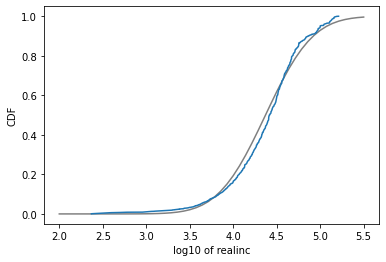

In [53]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

* The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.

### Exercise 3 - Comparing PDFs

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

Just as all norm objects have a `.cdf()` method, they also have a `.pdf()` method.

To create a KDE plot, you can use Seaborn's `kdeplot()` function. To learn more about this function and Seaborn, you can check out DataCamp's Data Visualization with Seaborn course. Here, Seaborn has been imported for you as `sns`.

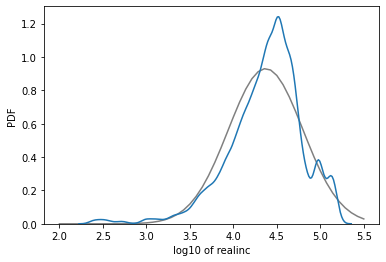

In [54]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

* We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. 

# Chapter 3 - Relationships

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

## Exploring relationships

* So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

### Height and weight dataset

* Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. 
* The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

In [55]:
filename = 'brfss.hdf5'
brfss = pd.read_hdf(datapath + filename, 'brfss')
type(brfss)

pandas.core.frame.DataFrame

### Scatter plot

* Scatter plots is a common way to visualize the relationship between two variables. 
* Scatter plots are common and readily understood, but they are surprisingly hard to get right. 


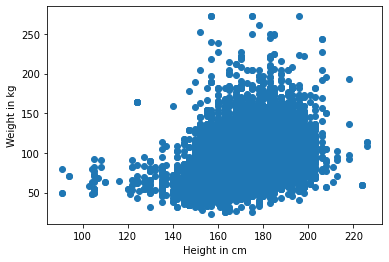

In [56]:
import matplotlib.pyplot as plt

height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

* This plot is hard to interpret, because it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. 
* When that happens, the results can be really misleading.

### Transparency and marker size

* The plot looks better, but now we can see that the points fall in discrete columns. 
  * That's because most heights were reported in inches and converted to centimeters. 
  * We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

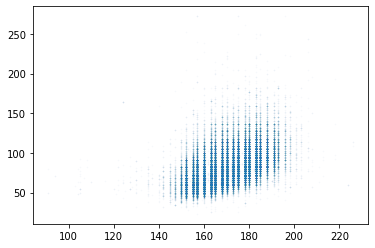

In [57]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.show()

### Jittering

* Adding random noise like this is called "jittering".
* In this example, I added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. 
* The columns are gone, but now we can see that there are rows where people rounded off their weight. 
* We can fix that by jittering weight, too.

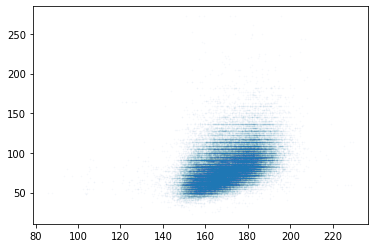

In [58]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.show()

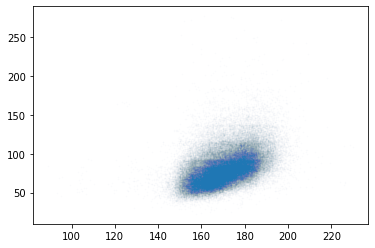

In [59]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.show()

### Zoom



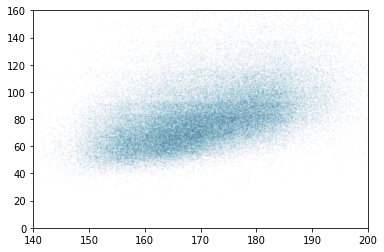

In [60]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()

* Finally, we have a reliable picture of the relationship between height and weight.

### Exercise 1 - PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.

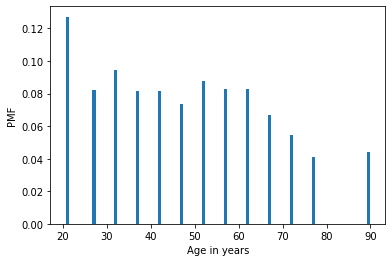

In [61]:
from empiricaldist import Pmf

# Extract age
age = brfss['AGE']

# Plot the PMF
Pmf.from_seq(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

### Exercise 2 - Scatter plot

Now let's make a scatterplot of `weight` versus `age`. To make the code run faster, I've selected only the first 1000 rows from the `brfss` DataFrame.

`weight` and `age` have already been extracted for you. Your job is to use `plt.plot()` to make a scatter plot.

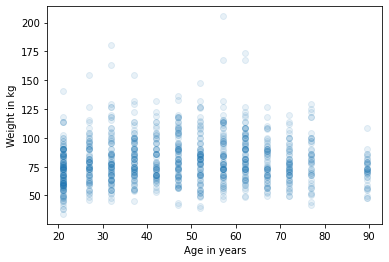

In [62]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

### Exercise 3 - Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

In [63]:
height = brfss['HTM4']
weight = brfss['WTKG3']
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

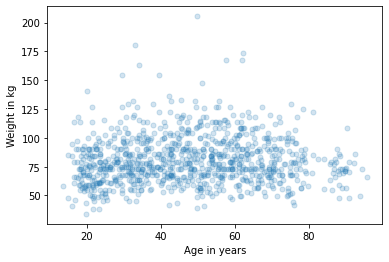

In [64]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

* By smoothing out the ages and avoiding saturation, we get the best view of the data. But in this case the nature of the relationship is still hard to see. In the next lesson, we'll see some other ways to visualize it.

## Visualizing relationships

### Another example

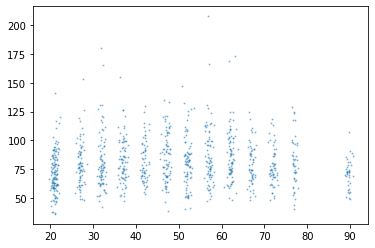

In [65]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.4)
plt.show()

### Violin plot

* Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data.

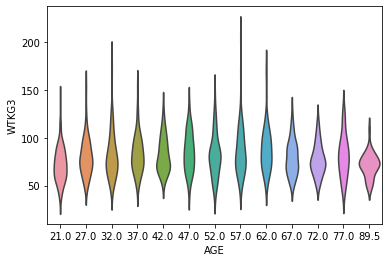

In [66]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

* Each column is a graphical representation of the distribution of weight in one age group. 
* The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. 

### Box plot

* Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile.
* The line in the middle of each box is the median. 
* The spines sticking out of the top and bottom show the minimum and maximum values. 
* This plot gives us the best view of the relationship between weight and age. 
  * Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. 
  * Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. 

* These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

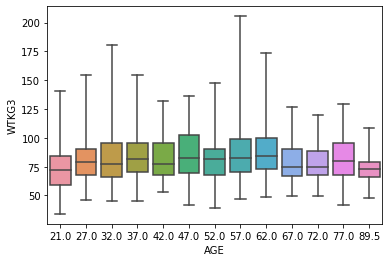

In [67]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

### Log scale

* For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. 
* We can do that with the pyplot function yscale(). 

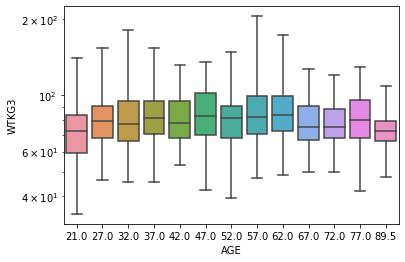

In [68]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

### Exercise 1 - Height and weight

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.


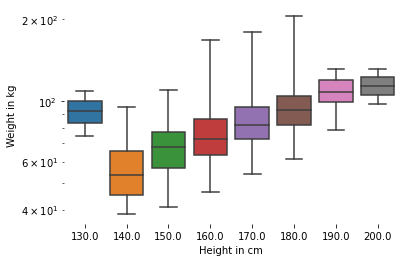

In [69]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

* These box plots provide a good view of the relationship between the variables. They also show the spread of the values in each column.

### Exercise 2 - Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

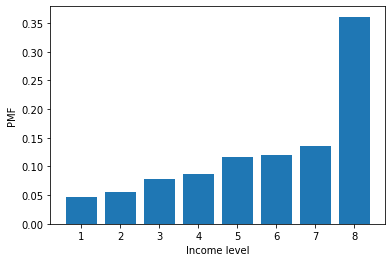

In [70]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

* Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.

### Exercise 3 - Income and height

Let's now use a violin plot to visualize the relationship between income and height.

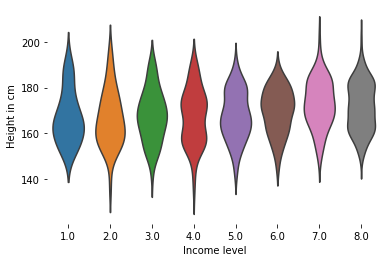

In [71]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

* It looks like there is a weak positive relationsip between income and height, at least for incomes below the median.

## Correlation coefficient

* When people say "correlation" casually, they might mean any relationship between two variables. 
* In statistics, it usually means **Pearson's correlation coefficient**, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables. 

In [72]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

In [73]:
# Using .corr() - The result is a correlation matrix
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.512347,-0.086079
WTKG3,0.512347,1.000000,0.051345
AGE,-0.086079,0.051345,1.000000


### Correlation matrix

* Height with itself: 1
  * The correlation of `HTM4` with itself is 1. That's expected; the correlation of anything with itself is 1.
* Height and weight: 0.51
  * The correlation of height and weight is positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. 
  * If you know someone's height, you can make a better guess about their weight, and vice versa.
* Height and age: -0.08
  * The correlation between height and age is negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height.
* Weight and age: 0.05
  * The correlation between age and weight is even smaller. 
  
  
* It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?



### Nonlinear relationships

* Correlation only works for linear relationships. 
  * This is one of the reasons correlation is not such a great statistic.
* If the relationship is nonlinear, correlation generally underestimates how strong it is. 

#### An example with fake data

In [74]:
import numpy as np

xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))
np.corrcoef(xs, ys) 

array([[ 1.        , -0.01899158],
       [-0.01899158,  1.        ]])

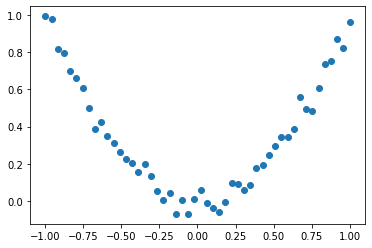

In [75]:
plt.scatter(xs, ys)

* We can see by the plot that given `x` we can guess what `y` should be.
* But the correlation matrix of this small dataset indicates a low correlation between `x` and `y`, which is close to 0.

* In general, if correlation is high, that is, close to 1 or -1, you can conclude that there is a **strong linear relationship**. 
* But if correlation is close to 0, that doesn't mean there is no relationship; there might be a **strong, non-linear relationship**. 

### You keep using that word

* There's another reason to be careful with correlation; it doesn't mean what people take it to mean. 
* Specifically, correlation says nothing about slope. 
* **If we say that two variables are correlated, that means we can use one to predict the other**. But that might not be what we care about.

### Exercise 1 - Computing correlations

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.

In [76]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


* The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. People with higher incomes eat more vegetables. But a correlation close to 0 does mean there is no relationship.

## Simple linear regression

* In some contexts the correlation statistic is not representative of the relationship between variables.
* In these contexts the statistic we probably care about is the slope of the line, not the correlation coefficient.
* To estimate the slope of the line, we can use `linregress()` from the SciPy stats module. 



In [77]:
from scipy.stats import linregress

# Hypothetical 1
res = linregress(xs, ys)
res

LinregressResult(slope=-0.01009426980523926, intercept=0.34538840342180066, rvalue=-0.0189915822421677, pvalue=0.8958497486602397, stderr=0.07670343380139653)

* `slope` : slope of the relationship
* `rvalue` : correlation 

### Regression line

* We can use the results from `linregress()` to compute the line of best fit.
* `linregress()` can't handle NaNs, so we have to use dropna() to remove rows that are missing the data we need.

In [78]:
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
res

LinregressResult(slope=0.9756429097243611, intercept=-85.06047892117603, rvalue=0.5123470895624022, pvalue=3.031033777085338e-63, stderr=0.05374057063828039)

* The slope is about 0.9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

### Line of best fit

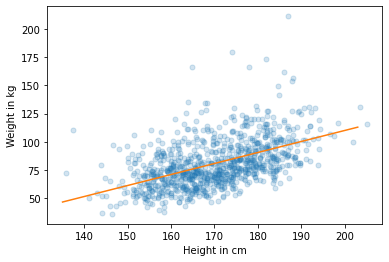

In [79]:
height = brfss['HTM4']
weight = brfss['WTKG3']
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=5, alpha=0.2)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy,'-')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Linear and nonlinear relationships

* However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. 
* To estimate non-linear relationships we have to use multiple regression. 

### Exercise 1 - Income and vegetables

As we saw in a previous exercise, the variable `'_VEGESU1'` represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [80]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


* The estimated slope tells you the increase in vegetable servings from one income group to the next.

### Exercise 2 - Fit a line

Continuing from the previous exercise:

* Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and

* `res` contains the results of a simple linear regression of `ys` onto `xs`.

Now, you're going to compute the line of best fit. NumPy has been imported for you as `np`.

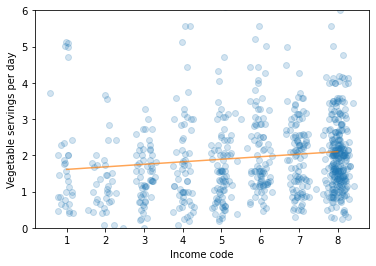

In [81]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

* We've seen several ways to visualize relationships between variables and quantify their strength. In the next chapter we use regression to explore relationships among more than two variables.

# Chapter 4 - Multivariate Thinking

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

## Limits of simple regression

* Regression is not symmetric; the regression of A onto B is not the same as the regression of B onto A.

* Regression doesn't tell you much about causation. 
  * In general, regression can't tell you what causes what. 
  * A might cause B, or B might cause A, or there might be other factors that cause both A and B. Regression alone can't tell you which way it goes.

### StatsModels library

* We can do multiple regression with a new library, StatsModels. 
* `ols` stands for "ordinary least squares", another name for regression. 
  * The first argument is a formula string that specifies that we want to regress income as a function of vegetable consumption. 
  * The second argument is the BRFSS DataFrame. The names in the formula correspond to columns in the DataFrame. 
  * The result from ols() represents the model; we have to run dot fit() to get the results. 

In [82]:
import statsmodels.formula.api as smf

results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    5.579385
_VEGESU1     0.189795
dtype: float64

### Exercise 1 - Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.



In [83]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


## Multiple regresion

### Income and education

* In the example we run a regression of real income as a function of years of education. 
  * On the left of the first argument, `realinc` is the variable we are trying to predict; on the right, `educ` is the variable we are using to inform the predictions. 

In [84]:
gss = pd.read_hdf(datapath + 'gss.hdf5', 'gss')

results = smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

* The estimated **slope** is 3586, which means that each additional year of education is associated with an increase of almost $3600 of income. 

* But income also depends on age, so it would be good to include that in the model, too.

### Adding age

In [85]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

* The estimated slope for education is 3655, a little more than in the previous model. 

* The estimated slope for age is only about $80 per year, which is surprisingly small.

### Income and age

In [86]:
grouped = gss.groupby('age')
grouped # Contains one group for each value of age

In [87]:
mean_income_by_age = grouped['realinc'].mean()

Text(0, 0.5, 'Income (1986 $)')

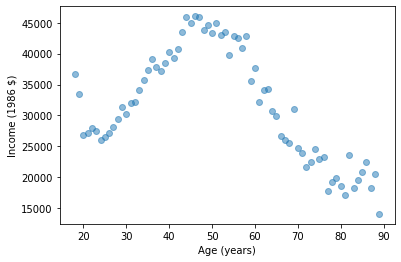

In [88]:
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

* Average income increases from age 20 to age 50, then starts to fall. 
  * And that explains why the estimated slope is so small, **because the relationship is non-linear**. 

* **Remember that correlation and simple regression can't measure non-linear relationships.** But multiple regression can!

### Adding a quadratic term

* To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables. 
* As an example, I'll create a new variable called `age2` that equals `age` squared. Now we can run a regression with both `age` and `age2` on the right side. 
* The slope associated with `age` is substantial, about $1700 per year. 
* The slope associated with `age2` is about -17, which is harder to interpret.

In [89]:
gss['age2'] = gss['age']**2

In [90]:
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

### Exerice 1 - Plot income and education

To get a closer look at the relationship between income and education, let's use the variable `'educ'` to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called `gss`.

In [91]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()
mean_income_by_educ.head()

educ
0.0    15290.635124
1.0    13347.171875
2.0    25174.645592
3.0    12203.863350
4.0    14038.376914
Name: realinc, dtype: float64

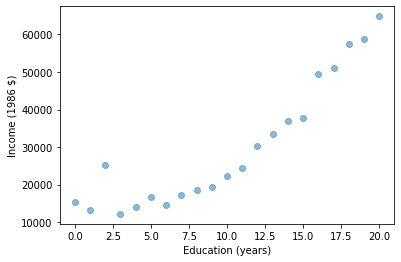

In [92]:
# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

*  It looks like the relationship between income and education is non-linear.

### Exercise 2 - Non-linear model of education

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

In [93]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


* The slope associated with `educ2` is positive, so the model curves upward.

* The parameters are hard to interpret. Fortunately, we don't have to -- sometimes the best way to understand a model is by looking at its predictions rather than its parameters.

## Visualizing regressing results

### Generating predictions

* The regression results object provides a method called predict() that uses the model to generate predictions.
* It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. 

In [94]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

In [95]:
df['educ'] = 12
df['educ2'] = df['educ']**2

In [96]:
pred12 = results.predict(df)

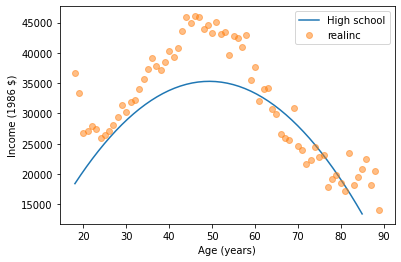

In [97]:
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5, label='realinc')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

* Holding education constant we can use results to predict the average income for each age group.

* The result from predict() is a Series with one prediction for each row.

* The results:
  * The blue dots show the average income in each age group.
  * The orange line shows the predictions generated by the model, holding education constant.
  * This plot shows the shape of the model, a downward-facing parabola.

### Different levels of education

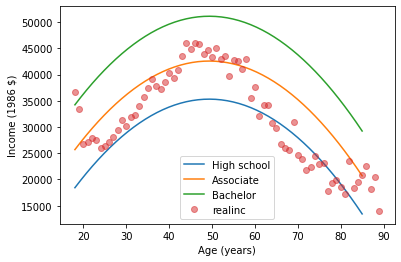

In [98]:
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)

plt.plot(df['age'], pred12, label='High school')
plt.plot(df['age'], pred14, label='Associate')
plt.plot(df['age'], pred16, label='Bachelor')
plt.plot(mean_income_by_age, 'o', alpha=0.5, label='realinc')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

* The lines show mean income, as predicted by the model, as a function of age, for three levels of education. 

* This visualization helps validate the model since we can compare the predictions with the data. 

* And it helps us interpret the model since we can see the separate contributions of age and education.

### Exercise 1 - Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding `age` constant.

In [99]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


### Exercise 2 - Visualizing predictions

Now let's visualize the results from the previous exercise!

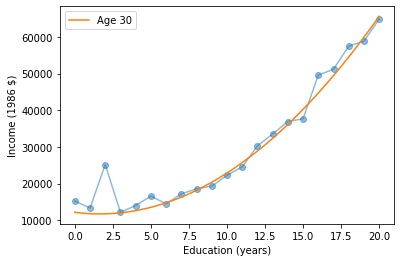

In [100]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, marker='o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

* `results` holds the regression of `income` considering the variables `educ`, `educ2`, `age`, `age2`

## Logistic regression

* Logistic regression is a powerful tool for exploring relationships between a binary variable and the factors that predict it. 

### Categorical variables

* Numerical variables: income, age, years of education.
* Categorical variables: sex, race.

### Sex and income

* Inside the formula for the regression model we use the syntax `C()` to indicate that the variable is categorical.
  * For the `sex` variable 1 is `male`and 2 is `female`

In [101]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

* This result indicates that income for women is about $4100 less than for men, after controlling for age and education.

### Boolean variable

* To explore the relationship between `gunlaw` variable and factors like age, sex, and education, we can use logistic regression.

* StatsModels provides logistic regression, but to use it, we have to recode the variable so 1 means yes and 0 means no.

In [102]:
gss['gunlaw'].value_counts()
# 1: yes | in favor of gun permit
# 2: no | not in favor of gun permit

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [103]:
gss['gunlaw'].replace([2], [0], inplace=True)

In [104]:
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

### Logistic regression

* The results of the logistic regresison are in the form of "log odds", which you may or may not be familiar with. 
  * Positive values are associated with things that make the outcome more likely;
  * Negative values make the outcome less likely.
* For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control.

In [105]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

### Generating predictions

In [106]:
# Education made constant
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12

In [107]:
# Variables for the multiple regression 
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

In [109]:
# Prediction for men
df['sex'] = 1
pred1 = results.predict(df)

In [110]:
# Prediction for women
df['sex'] = 2
pred2 = results.predict(df)

### Visualizing results

* For `gunlaw` the mean of a binary variable is the fraction of people in favor. 

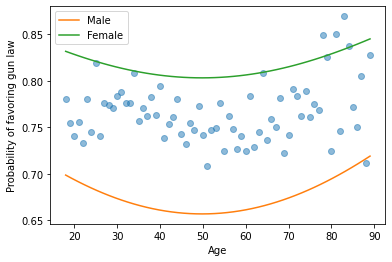

In [111]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()

* According to the model, people near age 50 are least likely to support gun control (at least as this question was posed). And women are more likely to support it than men, by almost 15 percentage points.

### Exercise 1 - Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable `grass` records the answer to the question "Do you think the use of marijuana should be made legal or not?"

In [112]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [113]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ'] ** 2

In [114]:
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

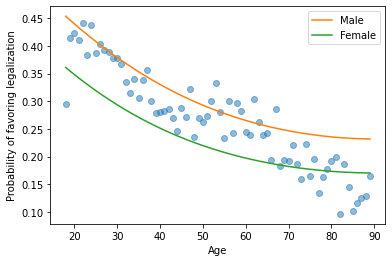

In [115]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

* Congratulations on completing this course. I hope you enjoyed it and learned a lot. Should you wish to use the `Pmf` and `Cdf` classes from this course in your own work, you can download the `empiricaldist` library here (https://pypi.org/project/empiricaldist/).

# Next steps - Course summary

## Chapter 1: Import, clean, and validate

* This chapter is about importing and cleaning the data, and checking for errors and other special conditions. 
* This might not be the most exciting part of the process, but if you skip these steps, it can come back to haunt you. 
* Time spent cleaning and validating data can save you from embarrassing, and sometimes expensive, errors.



## Chapter 2: Visualize distributions

* This chapter is about exploring **variables one at a time**, visualizing distributions using PMFs, CDFs, and KDE, and choosing appropriate summary statistics. 

* Using CDFs as the best way to explore distributions. 
* But when you present to audiences that are not familiar with CDFs, you can use PMFs if there are a small number of unique values, and KDE if there are a lot.

## Chapter 3: Explore relationships between variables

* In this chapter we explored relationships between variables two at a time, using scatter plots and other visualizations; and we quantified those relationships using correlation and simple regression. 

* We used the coefficient of correlation to quantify the strength of a relationship. 
* We also used simple regression to find the line of best fit.
* But remember that both of these methods only capture linear relationships; if the relationship is non-linear, they can be misleading. 
* Always look at a visualization, like this scatter plot, before computing correlation or simple regression.

## Chapter 4: Explore multivariate relationships

* Finally, in Chapter 4, we explored multivariate relationships using multiple regression and logistic regression.

* We used multiple regression to add control variables and to describe non-linear relationships.

* We used logistic regression to explain and predict binary variables.


## Where to next?

* Statistical Thinking in Python
* pandas Foundations
* Improving Your Data Visualizations in Python
* Introduction to Linear Modeling in Python